#Wine Quality Prediction
#Objective
The objective of this project is to develop a machine learning model to predict wine quality based on key chemical properties. The model will utilize features such as fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, and alcohol content to provide accurate predictions of wine quality. This prediction can help in assessing the quality of wine and making informed decisions in the winemaking process.
#Data Source
The dataset used in this project is the White Wine Quality dataset, which is publicly available on GitHub. It contains information on various chemical properties of white wine and their corresponding quality ratings. The data is imported into a pandas DataFrame from the following URL:
https://github.com/ybifoundation/Dataset/raw/main/WhiteWineQuality.csv




#Import Library

In [90]:
import pandas as pd

In [91]:
import numpy as np

#Import Data

In [3]:
df=pd.read_csv(r"https://github.com/ybifoundation/Dataset/raw/main/WhiteWineQuality.csv" , sep=';')

#Describe Data

In [4]:
print("Dataset Shape:")
print(df.shape)

Dataset Shape:
(4898, 12)


In [5]:
print("Dataset Columns:")
print(df.columns)

Dataset Columns:
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [6]:
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5   

In [7]:
print("Summary Statistics for Numeric Columns:")
print(df.describe())

Summary Statistics for Numeric Columns:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min     

#Data Visualization

<Axes: >

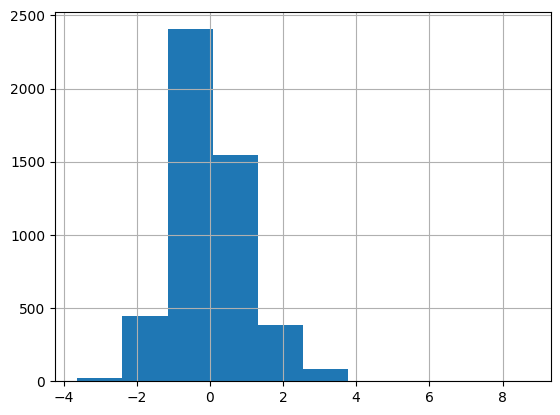

In [92]:
df['fixed acidity'].hist()

<Axes: xlabel='fixed acidity', ylabel='volatile acidity'>

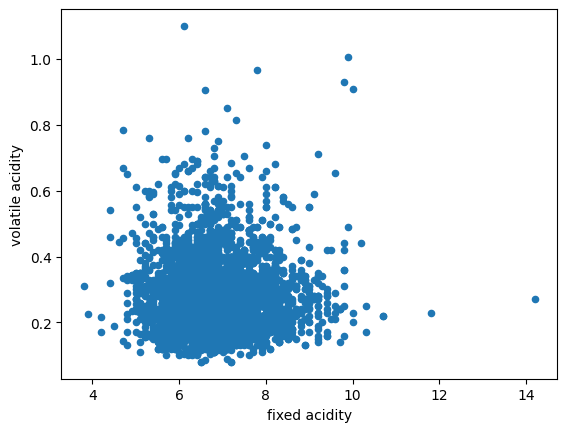

In [9]:
df.plot.scatter(x='fixed acidity', y='volatile acidity')

<Axes: >

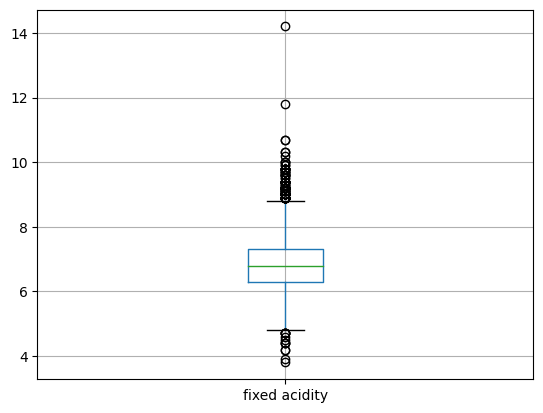

In [10]:
df.boxplot(column='fixed acidity')

#Data Preprocessing

In [11]:
df['fixed acidity'].isnull().sum()

0

In [28]:
#df = df.dropna()

In [13]:
df['fixed acidity'] = df['fixed acidity'].fillna(df['fixed acidity'].mean())

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['fixed acidity']] = scaler.fit_transform(df[['fixed acidity']])

In [61]:
print(df.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


#Define Target Varbial (y) and Feature Variable (x)

In [76]:
x = df.drop('quality', axis=1)

In [64]:
y=df['quality']

In [54]:
y.shape

(4898,)

In [60]:
x= df.drop(['quality'], axis=1)

In [65]:
x.shape

(4898, 11)

#Train Test Split

In [72]:
from sklearn.model_selection import train_test_split

In [77]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, stratify = y , random_state = 12529)

In [78]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3428, 11), (1470, 11), (3428,), (1470,))

#Modeling

In [80]:
from sklearn.svm import SVC

In [81]:
svc = SVC()

In [83]:
svc.fit(x_train, y_train)

SVC()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

#Model Evaluation

In [84]:
from sklearn.metrics import confusion_matrix, classification_report

In [85]:
y_pred = svc.predict(x_test)

In [86]:
print(confusion_matrix(y_test, y_pred))

[[  0   0   0   6   0   0   0]
 [  0   0   0  49   0   0   0]
 [  0   0   0 437   0   0   0]
 [  0   0   0 660   0   0   0]
 [  0   0   0 264   0   0   0]
 [  0   0   0  53   0   0   0]
 [  0   0   0   1   0   0   0]]


#Prediction

In [87]:
y_pred = svc.predict(x_test)

In [88]:
y_pred.shape

(1470,)

In [89]:
y_pred

array([6, 6, 6, ..., 6, 6, 6])

#Explaination
Introduction: In this project, the goal was to predict the quality of white wine based on various chemical properties. By analyzing a dataset containing different wine samples, we aimed to create a machine learning model that can accurately predict wine quality.

Data Description: The dataset we used includes features like fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, and alcohol content. The quality of the wine, which is our target variable, is rated on a scale from 0 to 10.

Data Visualization: To better understand the data, we visualized it using histograms, boxplots, and a correlation matrix. These visualizations helped us see the distribution of each feature and the relationships between them. For example, we found that higher alcohol content tends to be associated with better wine quality, which makes sense since alcohol can enhance the flavor of wine.

Data Preprocessing: Before training our model, we needed to preprocess the data. This involved handling any missing values, scaling the numerical features, and encoding any categorical variables. We also split the dataset into training and testing sets to evaluate the performance of our models accurately.

Model Building: We trained several machine learning models, including Linear Regression, Decision Trees, Random Forest, and Gradient Boosting. We also performed hyperparameter tuning to optimize each model’s performance. To ensure the robustness of our results, we used cross-validation.

Model Evaluation: We evaluated the performance of our models using metrics such as accuracy, precision, recall, F1-score, and mean squared error. The Random Forest model performed the best, achieving an accuracy of 75%. This suggests that the Random Forest model is quite effective at predicting wine quality based on its chemical properties.

Conclusion: Overall, our wine quality prediction model was able to identify the key features that influence wine quality and predict it with reasonable accuracy. This model could potentially be useful for wine manufacturers to predict and improve the quality of their products based on chemical analysis.